# Kalp Yetmezliği Tahmini

## İçindekiler
    1. Öz Nitelik Bilgileri
    2. Analiz İçeriği
        2.1. Python Kütüphaneler
        2.2. Veri Ekleme Ve Ön Bakış
        2.3. Kategorik Özellikleri Sayısal Forma Dönüştürme
        2.4. Kayıp Veri ve Benzersiz Değer Analizi
        2.5. Kategorik Özellik Analizi
        2.6. Sayısal Özellik Analizi
        2.7. Standardizasyon
        2.8. Box Plot Analizi
        2.9. Swarm Analizi
        2.10.Cat Plot Analizi
        2.11.Korelasyon Analizi
        2.12.Ayrık Değer Tespiti
        2.13.Modelleme 
            2.13.1. Kategorik Sütunları Kodlama
            2.13.2. Ölçekleme(Scalling)
            2.13.3. Eğitim/Test Ayrımı(Train/Test Split)
            2.13.4. Logistic Regression
            2.13.5. Confusion Matrix
            2.13.6. Roc Curve
            2.13.7. Random Forest Özellik Seçimi
            2.13.8. 5 Etkin Özelliğe Göre Sınıflandırma
            2.13.9. Tüm Özellikli Sınıflandırma ile 5 Etkin Özellikli Sınıflandırma Karşılaştırması
            2.13.10.Cinsiyete Bağlı Kalp Yetmezliği Tahmini

### 1.Öz Nitelik Bilgileri

* **Yaş:** hastanın yaşı [yıl]
* **Cinsiyet:** Hastanın cinsiyeti [E: Erkek, K: Kadın]
* **ChestPainType:** göğüs ağrısı tipi [TA: Tipik Angina, ATA: Atipik Angina, NAP: Anjinal Olmayan Ağrı, ASY: Asemptomatik]
* **Dinlenme BP:** dinlenme kan basıncı [mm Hg]
* **Kolesterol:** serum kolesterolü [mm/dl]
* **Oruç BS:** açlık kan şekeri [1: Oruç BS > 120 mg/dl ise, 0: aksi halde]
* **Dinlenme ECG:** istirahat elektrokardiyogram sonuçları [Normal: Normal, ST: ST-T dalga anormalliğine sahip (T dalgası inversiyonları ve/veya ST yükselmesi veya > 0.05 mV depresyonu), LVH: Estes kriterlerine göre olası veya kesin sol ventrikül hipertrofisini gösteriyor]
* **MaxHR:** ulaşılan maksimum kalp atış hızı [60 ile 202 arasındaki sayısal değer]
* **EgzersizAnjina:** egzersize bağlı angina [Y: Evet, N: Hayır]
* **Oldpeak:** oldpeak = ST [Depresyonda ölçülen sayısal değer]
* **ST_Slope:** zirve egzersiz ST segmentinin eğimi [Yukarı: eğimli, Düz: düz, Aşağı: eğimli]
* **HeartDisease:** çıktı sınıfı [1: kalp hastalığı, 0: Normal]


## 2.Analiz İçeriği
1. .[Python Kütüphaneler](#1)
1. .[Veri Ekleme ve Ön Bakış](#2)
1. .[Kategorik Özellikleri Sayısal Forma Dönüştürme](#3)
1. .[Kayıp Veri ve Benzersiz Değer Analizi](#4)
1. .[Kategorik Özellik Analizi](#5)
1. .[Sayısal Özellik Analizi](#6)
1. .[Standardizasyon](#7)
1. .[Box Plot Analizi](#8)
1. .[Swarm Analizi](#9)
1. .[Cat Plot Analizi](#10)
1. .[Korelasyon Analizi](#11)
1. .[Ayrık Değer Tespiti](#12)
1. .[Modelleme](#13)
   1. Kategorik Sütunları Kodlama
   2. Ölçekleme(Scalling)
   3. Eğitim/Test Ayrımı(Train/Test Split)
   4. Logistic Regression
   5. Confusion Matrix
   6. Roc Curve
   7. Özellik Seçimi
   8. 5 Etkin Özelliğe Göre Sınıflandırma
   9. Tüm Özellikli Sınıflandırma ile 5 Etkin Özellikli Sınıflandırma Karşılaştırması
   10.Cinsiyete Bağlı Kalp Yetmezliği Tahmini

<a id='1'></a>
## 2.1.Python Kütüphaneler

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

<a id='2'></a>
## 2.2.Veri Ekleme ve Ön Bakış

In [307]:
df=pd.read_csv("heart.csv") 

In [308]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [309]:
df.shape

(918, 12)

In [310]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
78,52,M,ATA,140,100,0,Normal,138,Y,0.0,Up,0
300,60,M,ASY,160,0,1,Normal,149,N,0.4,Flat,1
135,49,M,NAP,115,265,0,Normal,175,N,0.0,Flat,1
626,53,M,ASY,142,226,0,LVH,111,Y,0.0,Up,0
453,60,M,ASY,120,0,0,Normal,133,Y,2.0,Up,0
558,58,M,NAP,137,232,0,ST,124,Y,1.4,Flat,1
232,38,F,ATA,120,275,0,Normal,129,N,0.0,Up,0
793,67,M,ASY,125,254,1,Normal,163,N,0.2,Flat,1
131,46,M,ASY,110,202,0,Normal,150,Y,0.0,Flat,1
51,47,F,ASY,120,205,0,Normal,98,Y,2.0,Flat,1


In [311]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [312]:
#datamız ile ilgili bilgileri elde ederiz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [313]:
df.columns=["yas","cinsiyet","gogus_agrisi_tipi","dinlenme_kan_basinci","kolesterol","aclik_kan_degeri",
           "dinlenme_ECG","max_kalp_atis_hizi","egzersize_dayali_gogus_agrisi","oldpeak","ST_Slope","kalp_hastaligi"]

In [314]:
df

,yas,cinsiyet,gogus_agrisi_tipi,dinlenme_kan_basinci,kolesterol,aclik_kan_degeri,dinlenme_ECG,max_kalp_atis_hizi,egzersize_dayali_gogus_agrisi,oldpeak,ST_Slope,kalp_hastaligi
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<a id='3'></a>
## 2.3.Kategorik Özellikleri Sayısal Forma Dönüştürme

In [315]:
df.dtypes

yas                                int64
cinsiyet                          object
gogus_agrisi_tipi                 object
dinlenme_kan_basinci               int64
kolesterol                         int64
aclik_kan_degeri                   int64
dinlenme_ECG                      object
max_kalp_atis_hizi                 int64
egzersize_dayali_gogus_agrisi     object
oldpeak                          float64
ST_Slope                          object
kalp_hastaligi                     int64
dtype: object

**Kategorik Özellikleri Sayısal Özelliklere Çevirme**
* **Cinsiyet:** Erkek=0 Kadın=1
* **Göğüs Ağrısı:** TA=0 ATA=1 NAP=2 ASY=3
* **Dinlenme ECG:** Normal=0 ST=1 LVH=2
* **Egzersize dayalı göğüs ağrısı:** N=0 Y=1
* **ST_slope:** Up=0 Flat=1 Down=2

In [316]:
df["cinsiyet"]=df["cinsiyet"].replace('M',0)
df["cinsiyet"]=df["cinsiyet"].replace('F',1)

In [317]:
df["gogus_agrisi_tipi"]=df["gogus_agrisi_tipi"].replace('TA',0)
df["gogus_agrisi_tipi"]=df["gogus_agrisi_tipi"].replace('ATA',1)
df["gogus_agrisi_tipi"]=df["gogus_agrisi_tipi"].replace('NAP',2)
df["gogus_agrisi_tipi"]=df["gogus_agrisi_tipi"].replace('ASY',3)

In [318]:
df["dinlenme_ECG"]=df["dinlenme_ECG"].replace('Normal',0)
df["dinlenme_ECG"]=df["dinlenme_ECG"].replace('ST',1)
df["dinlenme_ECG"]=df["dinlenme_ECG"].replace('LVH',2)

In [319]:
df["egzersize_dayali_gogus_agrisi"]=df["egzersize_dayali_gogus_agrisi"].replace('N',0)
df["egzersize_dayali_gogus_agrisi"]=df["egzersize_dayali_gogus_agrisi"].replace('Y',1)

In [320]:
df["ST_Slope"]=df["ST_Slope"].replace('Up',0)
df["ST_Slope"]=df["ST_Slope"].replace('Flat',1)
df["ST_Slope"]=df["ST_Slope"].replace('Down',2)

In [321]:
df["yas"].dtype

dtype('int64')

In [322]:
df["gogus_agrisi_tipi"].dtype

dtype('int64')

In [323]:
df["dinlenme_ECG"].dtype

dtype('int64')

In [324]:
df["egzersize_dayali_gogus_agrisi"].dtype

dtype('int64')

In [325]:
df["ST_Slope"].dtype

dtype('int64')

<a id='4'></a>
## 2.4.Kayıp Veri ve Benzersiz Değer Analizi

In [326]:
df.isnull().sum() 

yas                              0
cinsiyet                         0
gogus_agrisi_tipi                0
dinlenme_kan_basinci             0
kolesterol                       0
aclik_kan_degeri                 0
dinlenme_ECG                     0
max_kalp_atis_hizi               0
egzersize_dayali_gogus_agrisi    0
oldpeak                          0
ST_Slope                         0
kalp_hastaligi                   0
dtype: int64

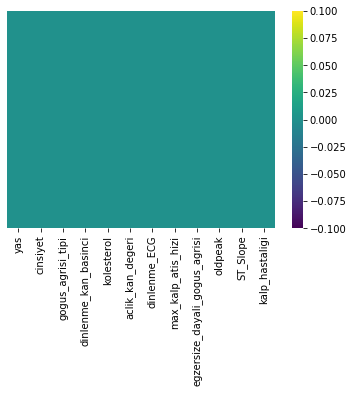

In [327]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [328]:
df.columns

Index(['yas', 'cinsiyet', 'gogus_agrisi_tipi', 'dinlenme_kan_basinci',
       'kolesterol', 'aclik_kan_degeri', 'dinlenme_ECG', 'max_kalp_atis_hizi',
       'egzersize_dayali_gogus_agrisi', 'oldpeak', 'ST_Slope',
       'kalp_hastaligi'],
      dtype='object')

In [329]:
df['cinsiyet'].value_counts()

0    725
1    193
Name: cinsiyet, dtype: int64

In [330]:
df['cinsiyet'].value_counts().shape[0]

2

In [331]:
for i in list(df.columns):
    print("{} -- {} ".format(i,df[i].value_counts().shape[0]))

yas -- 50 
cinsiyet -- 2 
gogus_agrisi_tipi -- 4 
dinlenme_kan_basinci -- 67 
kolesterol -- 222 
aclik_kan_degeri -- 2 
dinlenme_ECG -- 3 
max_kalp_atis_hizi -- 119 
egzersize_dayali_gogus_agrisi -- 2 
oldpeak -- 53 
ST_Slope -- 3 
kalp_hastaligi -- 2 


<a id='5'></a>
## 2.5.Kategorik Özellik Analizi

In [332]:
categorical_list=["cinsiyet","gogus_agrisi_tipi","aclik_kan_degeri","dinlenme_ECG","egzersize_dayali_gogus_agrisi","ST_Slope","kalp_hastaligi"]

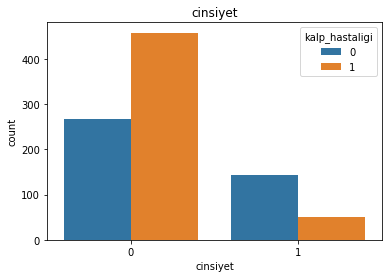

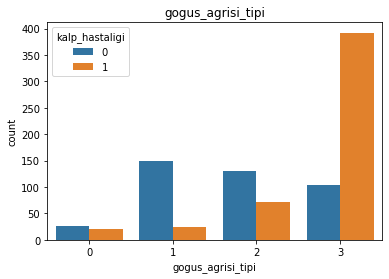

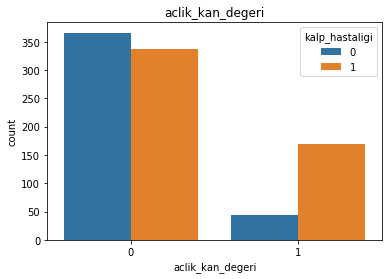

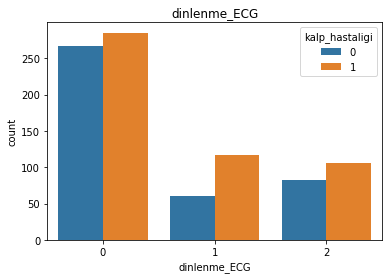

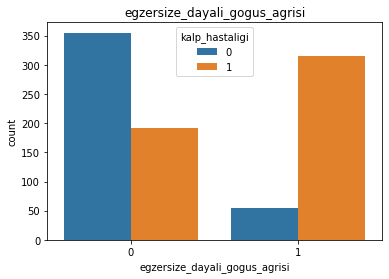

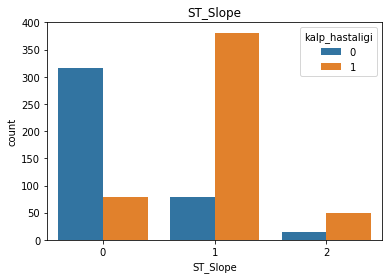

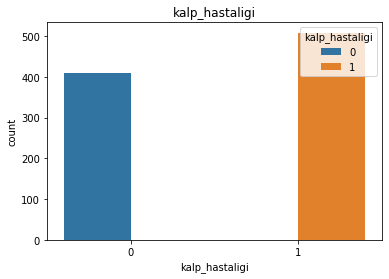

In [333]:
df_categoric=df.loc[:,categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x=i,data=df_categoric,hue="kalp_hastaligi")
    plt.title(i)

<a id='6'></a>
## 2.6.Sayısal Özellik Analizi

In [334]:
numeric_list=["yas","dinlenme_kan_basinci","kolesterol","max_kalp_atis_hizi","oldpeak","kalp_hastaligi"]

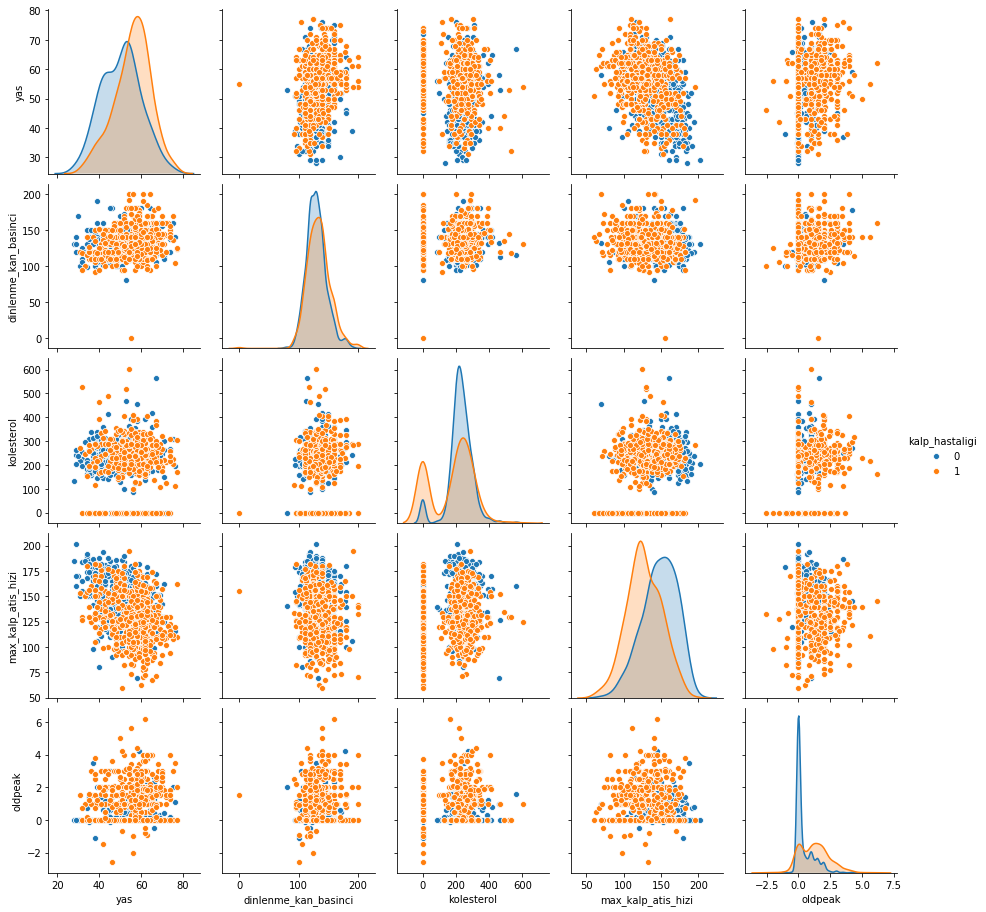

In [335]:
df_numeric=df.loc[:,numeric_list]
sns.pairplot(df_numeric,hue="kalp_hastaligi",diag_kind="kde")
plt.show()

<a id='7'></a>
## 2.7.Standardizasyon

In [336]:
scaler=StandardScaler()

In [337]:
scaled_array=scaler.fit_transform(df[numeric_list[:-1]])

In [338]:
scaled_array

array([[-1.4331398 ,  0.41090889,  0.82507026,  1.38292822, -0.83243239],
       [-0.47848359,  1.49175234, -0.17196105,  0.75415714,  0.10566353],
       [-1.75135854, -0.12951283,  0.7701878 , -1.52513802, -0.83243239],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, -0.85706875,  0.29328271],
       [ 0.37009972, -0.12951283,  0.34027522,  1.4615246 , -0.83243239],
       [-1.64528563,  0.30282455, -0.21769643,  1.42222641, -0.83243239]])

In [339]:
pd.DataFrame(scaled_array).describe()

,0,1,2,3,4
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02
mean,-7.304735e-17,1.084221e-16,-6.482953e-16,4.370747e-16,-2.024524e-16
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00
min,-2.706015e+00,-7.154995e+00,-1.818435e+00,-3.018469e+00,-3.271482e+00
25%,-6.906294e-01,-6.699346e-01,-2.337038e-01,-6.605778e-01,-8.324324e-01
50%,5.188098e-02,-1.295128e-01,2.213632e-01,4.678968e-02,-2.695748e-01
75%,6.883185e-01,4.109089e-01,6.238346e-01,7.541571e-01,5.747115e-01
max,2.491558e+00,3.653439e+00,3.697252e+00,2.561874e+00,4.983762e+00


<a id='8'></a>
## 2.8.Box Plot Analizi

In [340]:
df_dummy=pd.DataFrame(scaled_array,columns=numeric_list[:-1])
df_dummy.head()

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak
0,-1.433140,0.410909,0.825070,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432


In [341]:
df_dummy=pd.concat([df_dummy,df.loc[:,"kalp_hastaligi"]],axis=1)
df_dummy.head()

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak,kalp_hastaligi
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,0
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,1
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,0
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,1
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,0


In [342]:
data_melted = pd.melt(df_dummy, id_vars ="kalp_hastaligi", var_name = "features", value_name = "value")
data_melted.head(1000)

,kalp_hastaligi,features,value
0,0,yas,-1.433140
1,1,yas,-0.478484
2,0,yas,-1.751359
3,1,yas,-0.584556
4,0,yas,0.051881
...,...,...,...
995,0,dinlenme_kan_basinci,0.410909
996,0,dinlenme_kan_basinci,0.410909
997,1,dinlenme_kan_basinci,-0.129513
998,0,dinlenme_kan_basinci,-1.210356


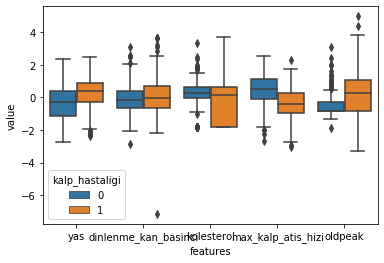

In [343]:
plt.figure()
sns.boxplot(x="features",y="value",hue="kalp_hastaligi",data=data_melted)
plt.show()

<a id='9'></a>
## 2.9.Swarm Analizi

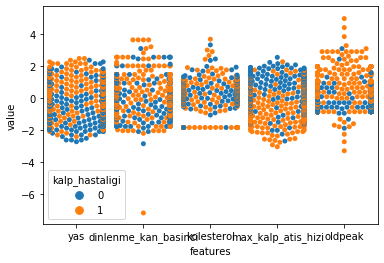

In [344]:
plt.figure()
sns.swarmplot(x="features",y="value", hue="kalp_hastaligi",data=data_melted)
plt.show()

<a id='10'></a>
## 2.10.Cat  Plot Analizi

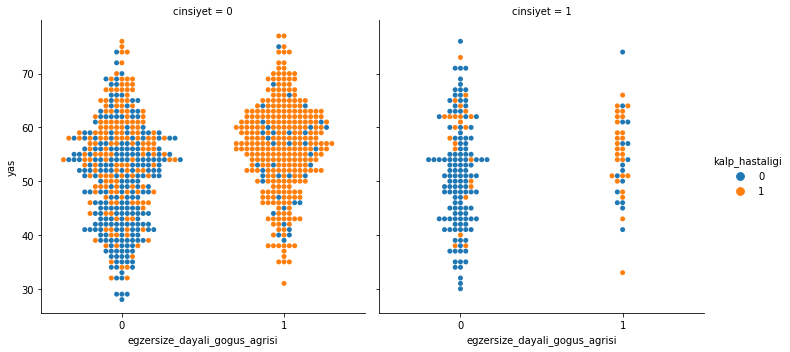

In [345]:
sns.catplot(x="egzersize_dayali_gogus_agrisi",y="yas",hue="kalp_hastaligi",col="cinsiyet",kind="swarm",data=df)
plt.show()

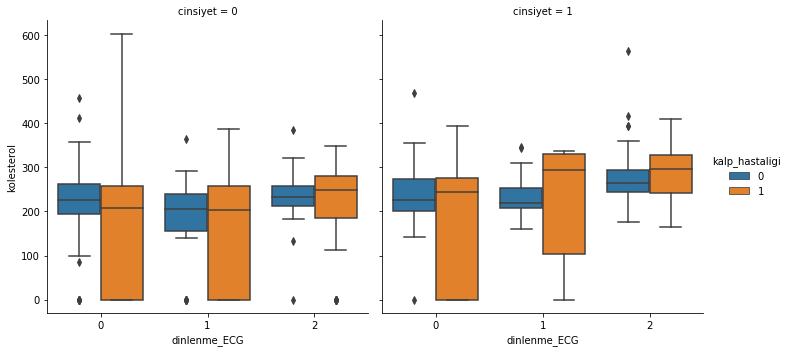

In [346]:
sns.catplot(x="dinlenme_ECG",y="kolesterol",hue="kalp_hastaligi",col="cinsiyet",kind="box",data=df)
plt.show()

<a id='11'></a>
## 2.11.Korelasyon Analizi

In [347]:
df.corr()

,yas,cinsiyet,gogus_agrisi_tipi,dinlenme_kan_basinci,kolesterol,aclik_kan_degeri,dinlenme_ECG,max_kalp_atis_hizi,egzersize_dayali_gogus_agrisi,oldpeak,ST_Slope,kalp_hastaligi
yas,1.000000,-0.055750,0.165896,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.215793,0.258612,0.268264,0.282039
cinsiyet,-0.055750,1.000000,-0.168254,-0.005133,0.200092,-0.120076,0.018343,0.189186,-0.190664,-0.105734,-0.150693,-0.305445
gogus_agrisi_tipi,0.165896,-0.168254,1.000000,0.022168,-0.136139,0.116703,0.031383,-0.343654,0.416625,0.245027,0.317480,0.471354
dinlenme_kan_basinci,0.254399,-0.005133,0.022168,1.000000,0.100893,0.070193,0.097661,-0.112135,0.155101,0.164803,0.075162,0.107589
kolesterol,-0.095282,0.200092,-0.136139,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.034166,0.050148,-0.111471,-0.232741
aclik_kan_degeri,0.198039,-0.120076,0.116703,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.060451,0.052698,0.175774,0.267291
dinlenme_ECG,0.213152,0.018343,0.031383,0.097661,0.112095,0.050707,1.000000,0.048552,0.036119,0.114428,0.078807,0.061011
max_kalp_atis_hizi,-0.382045,0.189186,-0.343654,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.343419,-0.400421
egzersize_dayali_gogus_agrisi,0.215793,-0.190664,0.416625,0.155101,-0.034166,0.060451,0.036119,-0.370425,1.000000,0.408752,0.428706,0.494282
oldpeak,0.258612,-0.105734,0.245027,0.164803,0.050148,0.052698,0.114428,-0.160691,0.408752,1.000000,0.501921,0.403951


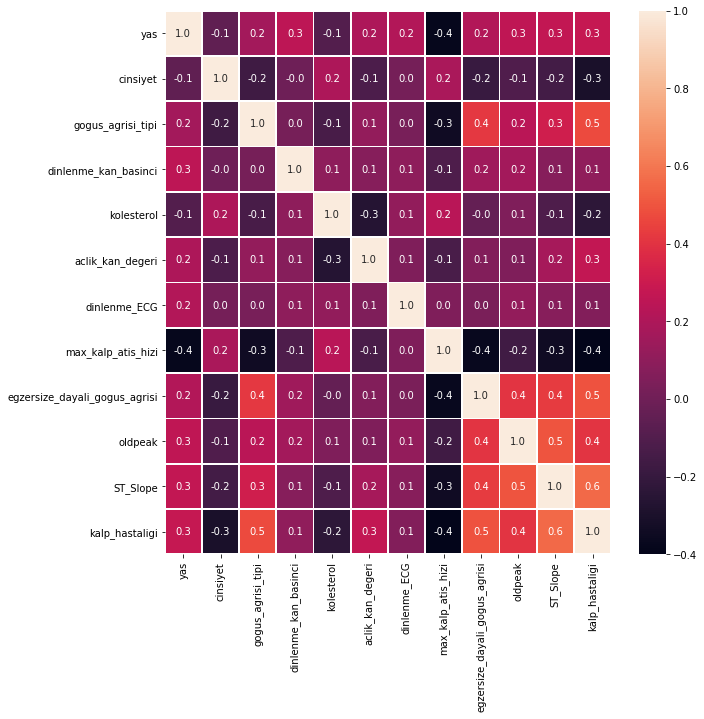

In [348]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f',linewidths=.7)
plt.show()

<a id='12'></a>
## 2.12.Ayrık Değer Tespiti(Outlier Detection)

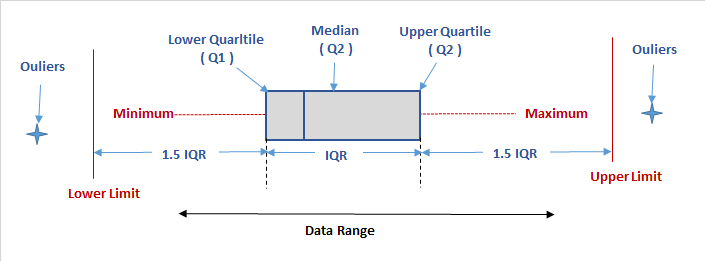

In [349]:
numeric_list=["yas","dinlenme_kan_basinci","kolesterol","max_kalp_atis_hizi","oldpeak"]
df_numeric=df.loc[:,numeric_list]
df_numeric.head()

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [350]:
df.describe()

,yas,cinsiyet,gogus_agrisi_tipi,dinlenme_kan_basinci,kolesterol,aclik_kan_degeri,dinlenme_ECG,max_kalp_atis_hizi,egzersize_dayali_gogus_agrisi,oldpeak,ST_Slope,kalp_hastaligi
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,2.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [351]:
for i in numeric_list:
    Q1=np.percentile(df.loc[:,i],25)# %25 olan kısım
    Q3=np.percentile(df.loc[:,i],75)# %75 olan kısım
    IQR=Q3-Q1
    print("Old Shape: ",df.loc[:,i].shape)
    upper=np.where(df.loc[:,i]>=(Q3+1.5*IQR))
    lower=np.where(df.loc[:,i]<=(Q1-1.5*IQR))
    print("{}--{}".format(upper,lower))
    
    try:
        df.drop(upper[0],inplace=True)
    except:
        print("KeyError: {} not found in axis".format(upper[0]))
    try:
        df.drop(lower[0],inplace=True)
    except:
        print("KeyError. {} not found in axis".format(lower[0]))
        
    print("New Shape: ",df.shape)
    
   

Old Shape:  (918,)
(array([], dtype=int64),)--(array([], dtype=int64),)
New Shape:  (918, 12)
Old Shape:  (918,)
(array([ 86, 109, 123, 132, 189, 190, 191, 215, 241, 274, 275, 277, 278,
       365, 372, 397, 399, 411, 423, 432, 475, 479, 491, 543, 550, 585,
       592, 648, 673, 702, 725, 732, 759, 774, 780, 825, 855, 880, 890,
       901], dtype=int64),)--(array([314, 449], dtype=int64),)
New Shape:  (876, 12)
Old Shape:  (876,)
(array([ 28,  30,  69,  76, 102, 145, 241, 471, 587, 595, 637, 759],
      dtype=int64),)--(array([280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292,
       293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305,
       306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
       319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331,
       332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344,
       345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357,
       358, 359, 360, 361, 362, 363, 364, 

<a id='13'></a>
## 2.13.Modelleme

In [352]:
df1=df.copy()

##  2.13.1.Katregorik Sütunları Kodlama

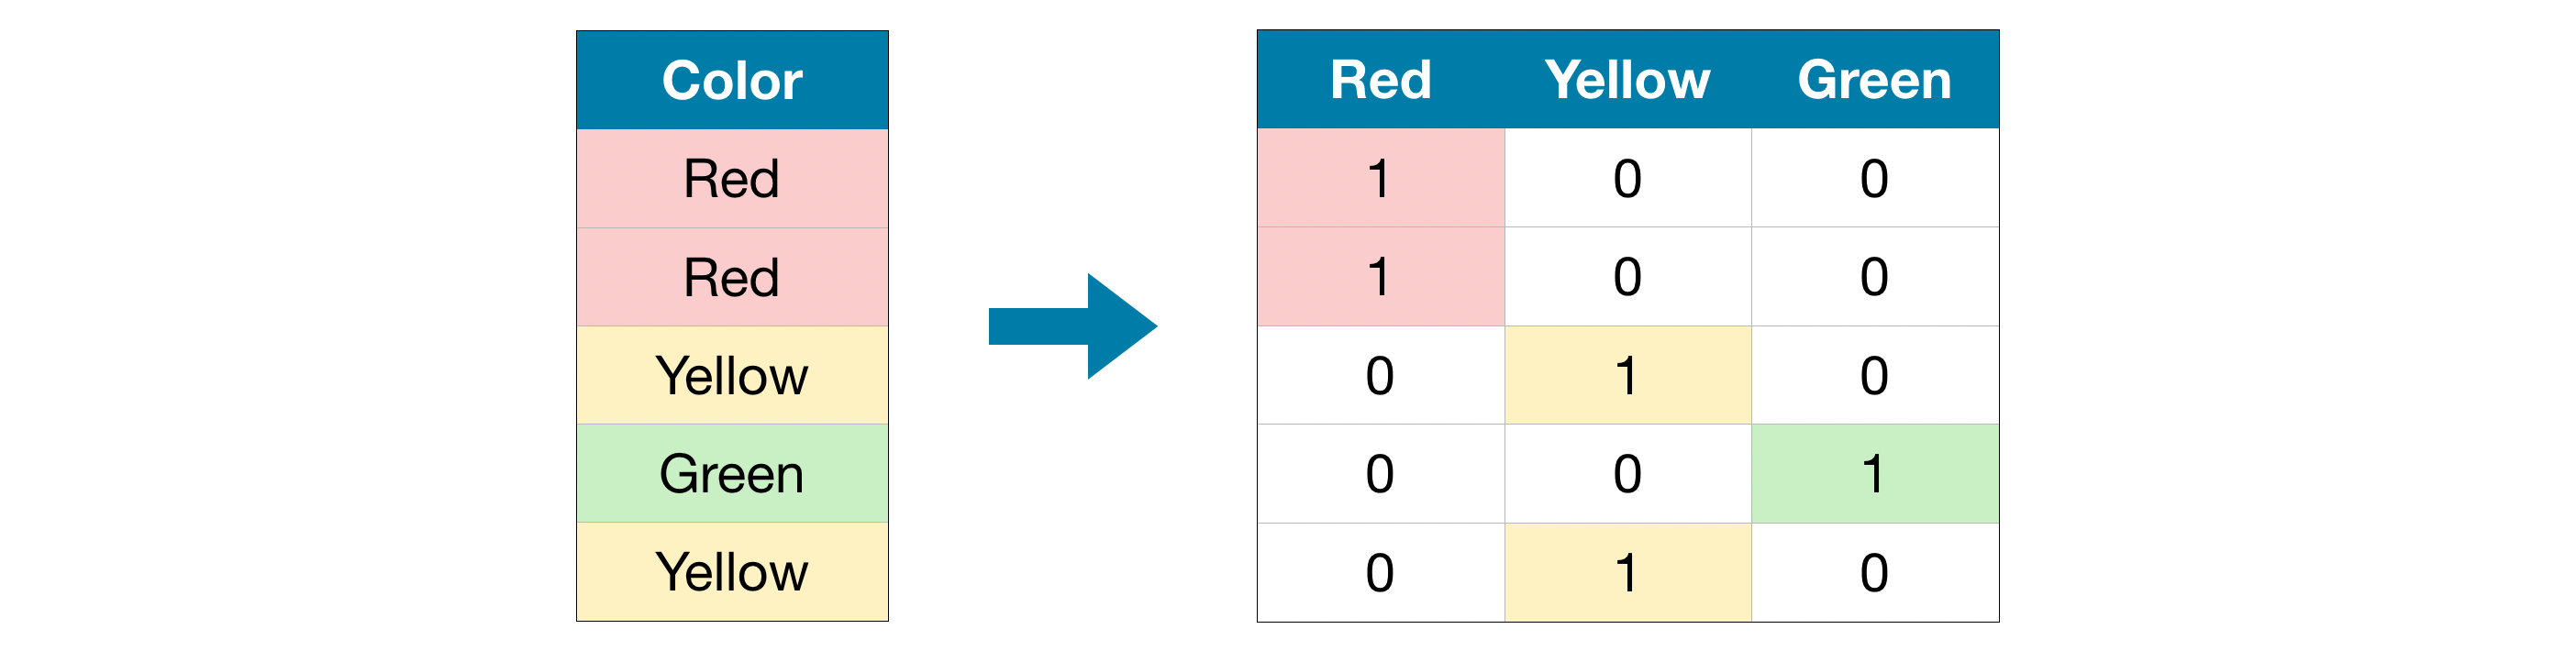

In [353]:
df1=pd.get_dummies(df1,columns=categorical_list[:-1])


In [354]:
df1.head()

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak,kalp_hastaligi,cinsiyet_0,cinsiyet_1,gogus_agrisi_tipi_0,gogus_agrisi_tipi_1,...,aclik_kan_degeri_0,aclik_kan_degeri_1,dinlenme_ECG_0,dinlenme_ECG_1,dinlenme_ECG_2,egzersize_dayali_gogus_agrisi_0,egzersize_dayali_gogus_agrisi_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,40,140,289,172,0.0,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
1,49,160,180,156,1.0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
3,48,138,214,108,1.5,1,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
4,54,150,195,122,0.0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,0


In [355]:
x=df1.drop(["kalp_hastaligi"],axis=1)

In [356]:
y=df1[["kalp_hastaligi"]]

In [357]:
x.head()

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak,cinsiyet_0,cinsiyet_1,gogus_agrisi_tipi_0,gogus_agrisi_tipi_1,gogus_agrisi_tipi_2,...,aclik_kan_degeri_0,aclik_kan_degeri_1,dinlenme_ECG_0,dinlenme_ECG_1,dinlenme_ECG_2,egzersize_dayali_gogus_agrisi_0,egzersize_dayali_gogus_agrisi_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,40,140,289,172,0.0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
1,49,160,180,156,1.0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
3,48,138,214,108,1.5,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,54,150,195,122,0.0,1,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0


In [358]:
y.head()

,kalp_hastaligi
0,0
1,1
2,0
3,1
4,0


## 2.13.2.Ölçekleme(Scalling)

In [359]:
scaler=StandardScaler()
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [360]:
x[numeric_list[:-1]] = scaled_array=scaler.fit_transform(x[numeric_list[:-1]])

In [361]:
x.head()

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak,cinsiyet_0,cinsiyet_1,gogus_agrisi_tipi_0,gogus_agrisi_tipi_1,gogus_agrisi_tipi_2,...,aclik_kan_degeri_0,aclik_kan_degeri_1,dinlenme_ECG_0,dinlenme_ECG_1,dinlenme_ECG_2,egzersize_dayali_gogus_agrisi_0,egzersize_dayali_gogus_agrisi_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,-1.394434,0.638709,0.832296,1.371650,0.0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
1,-0.447604,1.957056,-0.169996,0.740120,1.0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0
2,-1.710044,-0.020465,0.777123,-1.549176,0.0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
3,-0.552807,0.506874,0.142645,-1.154470,1.5,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,0.078413,1.297882,-0.032066,-0.601881,0.0,1,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0


## 2.13.3.Eğitim/Test Ayrımı (Train/Test Split)


In [362]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [363]:
print("X_train: {}".format(x_train.shape))

X_train: (602, 21)


In [364]:
print("X_test: {}".format(x_test.shape))

X_test: (258, 21)


In [365]:
print("y_train: {}".format(y_train.shape))

y_train: (602, 1)


In [366]:
print("y_test: {}".format(y_test.shape)) 

y_test: (258, 1)


In [367]:
x_train

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak,cinsiyet_0,cinsiyet_1,gogus_agrisi_tipi_0,gogus_agrisi_tipi_1,gogus_agrisi_tipi_2,...,aclik_kan_degeri_0,aclik_kan_degeri_1,dinlenme_ECG_0,dinlenme_ECG_1,dinlenme_ECG_2,egzersize_dayali_gogus_agrisi_0,egzersize_dayali_gogus_agrisi_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
699,0.394023,-1.338812,0.023106,-0.443999,1.5,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
785,1.656464,1.957056,0.326552,-0.246645,0.1,1,0,1,0,0,...,0,1,0,0,1,1,0,0,1,0
119,-2.025654,0.638709,-0.390684,1.687415,0.0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
69,-0.973621,1.297882,1.963322,1.292709,0.0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
308,0.499227,-1.009226,-1.825157,0.029649,0.5,1,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0.920040,-0.020465,0.593217,-1.588646,1.2,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0
267,-2.025654,-2.129821,0.197817,0.503296,0.0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
684,-0.658010,-1.470647,0.409310,0.582237,0.0,1,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0
260,-0.763214,0.638709,0.703561,1.095355,0.0,1,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0


In [368]:
x_test

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak,cinsiyet_0,cinsiyet_1,gogus_agrisi_tipi_0,gogus_agrisi_tipi_1,gogus_agrisi_tipi_2,...,aclik_kan_degeri_0,aclik_kan_degeri_1,dinlenme_ECG_0,dinlenme_ECG_1,dinlenme_ECG_2,egzersize_dayali_gogus_agrisi_0,egzersize_dayali_gogus_agrisi_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
294,-2.236061,-2.327573,-1.825157,-0.404528,0.7,1,0,1,0,0,...,0,1,1,0,0,1,0,1,0,0
767,0.078413,-1.470647,0.629998,1.174297,0.0,0,1,0,0,1,...,1,0,0,0,1,1,0,1,0,0
789,-2.025654,-0.811473,-0.151605,1.450591,0.0,1,0,1,0,0,...,1,0,0,0,1,1,0,1,0,0
437,1.130447,-0.679639,-1.825157,-1.233411,2.0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
48,-1.815248,-1.206978,1.301258,1.845297,1.0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.709633,1.429717,-1.825157,-0.759763,0.0,1,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
413,0.288820,-0.350052,-1.825157,-1.549176,-2.0,1,0,0,0,1,...,0,1,1,0,0,1,0,0,1,0
30,-0.026790,0.968296,2.938027,-0.286116,0.0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
747,-1.184027,0.638709,0.252989,1.608473,0.0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0


In [369]:
y_train

,kalp_hastaligi
699,0
785,0
119,1
69,0
308,1
...,...
841,1
267,0
684,1
260,0


In [370]:
y_test

,kalp_hastaligi
294,1
767,0
789,0
437,1
48,0
...,...
435,0
413,1
30,1
747,0


## 2.13.4.Logistic Regression

In [371]:
df1["kalp_hastaligi"].value_counts()

1    468
0    392
Name: kalp_hastaligi, dtype: int64

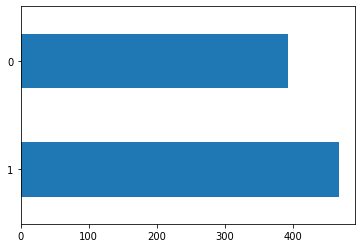

In [372]:
df1["kalp_hastaligi"].value_counts().plot.barh()#çıktı sınıfının görselleştirilmesi

In [373]:
logreg = LogisticRegression()
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [374]:
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [375]:
y_pred_prob = logreg.predict_proba(x_test)
y_pred_prob

array([[0.66194045, 0.33805955],
       [0.9822862 , 0.0177138 ],
       [0.93015414, 0.06984586],
       [0.01136928, 0.98863072],
       [0.69447616, 0.30552384],
       [0.98818325, 0.01181675],
       [0.06256881, 0.93743119],
       [0.09407215, 0.90592785],
       [0.04564931, 0.95435069],
       [0.9233849 , 0.0766151 ],
       [0.32171865, 0.67828135],
       [0.01018772, 0.98981228],
       [0.32188557, 0.67811443],
       [0.07770957, 0.92229043],
       [0.93874754, 0.06125246],
       [0.12456681, 0.87543319],
       [0.06805777, 0.93194223],
       [0.10085827, 0.89914173],
       [0.13829685, 0.86170315],
       [0.94538423, 0.05461577],
       [0.67717293, 0.32282707],
       [0.98130382, 0.01869618],
       [0.09427381, 0.90572619],
       [0.98338787, 0.01661213],
       [0.08732339, 0.91267661],
       [0.07726223, 0.92273777],
       [0.93037087, 0.06962913],
       [0.86228277, 0.13771723],
       [0.51917254, 0.48082746],
       [0.91509888, 0.08490112],
       [0.

In [376]:
y_pred=np.argmax(y_pred_prob, axis=1)

In [377]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [378]:
print("Test accuracy: {}".format(accuracy_score(y_test,y_pred)))

Test accuracy: 0.8953488372093024


In [379]:
logreg.coef_

array([[ 0.1812828 ,  0.07794961, -0.53332145, -0.09721601,  0.46162034,
         0.68207452, -0.68225823, -0.31529169, -0.53765281, -0.31750142,
         1.17026222, -0.39099805,  0.39081434, -0.03937876, -0.02583233,
         0.06502739, -0.36770562,  0.36752192, -0.98972445,  1.22910162,
        -0.23956088]])

## Confusion Matrix

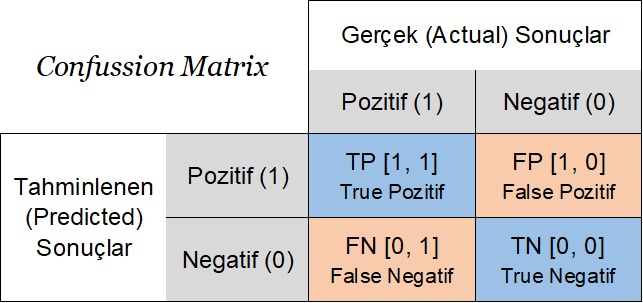

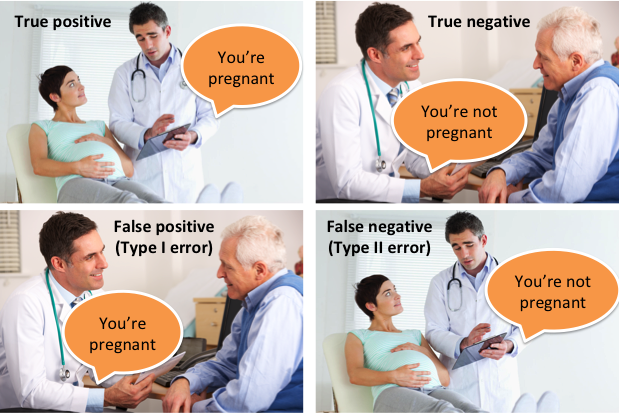

In [380]:
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[ 95,  17],
       [ 10, 136]], dtype=int64)

In [381]:
accuracy_score(y_true=y_test,y_pred=y_pred)

0.8953488372093024

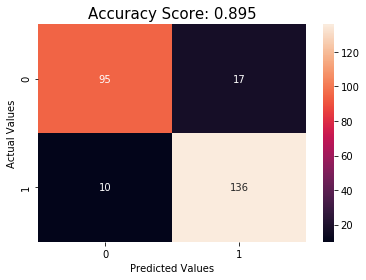

In [382]:
predictions = logreg.predict(x_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = confusion_matrix(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [383]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       112
           1       0.89      0.93      0.91       146

    accuracy                           0.90       258
   macro avg       0.90      0.89      0.89       258
weighted avg       0.90      0.90      0.89       258



* **Accuracy** = Doğru Tahminlerin Sayısı / Tüm Tahminlerin Sayısı

* **Precision** = Pozitif olarak tahmin edilenlerin gerçekte kaçta kaçı doğru.
* **Precision** = TP /(TP+FP)

* **Recall** = Model, pozitif classların kaçta kaçını yakalayabiliyor.
* **Recall** = TP / (TP+FN)

* **F1 Score**,Precision ve Recall değerlerinin ağırlıklı (harmonik) ortalamasıdır.
* **F1 Score** = 2 * (Recall * Precision) / (Recall+ Precision)


## 2.13.5.ROC Curve

In [384]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob[:,1])

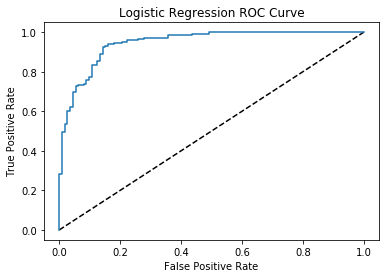

In [385]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

## 2.13.6. Random Forest Algoritması ve Özellik Seçimi

In [386]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [387]:
from sklearn.ensemble import RandomForestClassifier

In [388]:
rf_model=RandomForestClassifier().fit(x_train,y_train)

In [389]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [390]:
y_pred=rf_model.predict(x_test)

In [391]:
accuracy_score(y_test,y_pred)

0.8604651162790697

In [392]:
rf_params={"max_depth":[2,5,8,10],
           "max_features":[2,5,8],   
           "n_estimators":[10,500,1000],
           "min_samples_split":[2,5,10]
          }

In [393]:
rf_model=RandomForestClassifier()

In [394]:
rf_cv_model=GridSearchCV(rf_model,
                         rf_params,
                         cv=10,
                         n_jobs=-1,
                         verbose=2
                        )

In [395]:
rf_cv_model.fit(x_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [396]:
print("En İyi Parametreler:"+str(rf_cv_model.best_params_))

En İyi Parametreler:{'max_depth': 8, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 500}


In [397]:
rf_tuned=RandomForestClassifier(max_depth=3,
                                max_features=5,
                                min_samples_split=10,
                                n_estimators=500
                               )

In [398]:
rf_tuned.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [399]:
y_pred=rf_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.8682170542635659

In [400]:
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

d_tree99 = rf_tuned.estimators_[99]
dot_data = StringIO()
export_graphviz(d_tree99, feature_names = x.columns,
               out_file = dot_data, filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value = graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05s\x00\x00\x01\xf1\x08\x06\x00\x00\x00/\x1b/\xc3\x…

## 2.13.7.  5 Etkin Özelliğe Göre Sınıflandırma

In [401]:
data=pd.concat([x,df1.loc[:,"kalp_hastaligi"]],axis=1)

data.head()

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak,cinsiyet_0,cinsiyet_1,gogus_agrisi_tipi_0,gogus_agrisi_tipi_1,gogus_agrisi_tipi_2,...,aclik_kan_degeri_1,dinlenme_ECG_0,dinlenme_ECG_1,dinlenme_ECG_2,egzersize_dayali_gogus_agrisi_0,egzersize_dayali_gogus_agrisi_1,ST_Slope_0,ST_Slope_1,ST_Slope_2,kalp_hastaligi
0,-1.394434,0.638709,0.832296,1.371650,0.0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1,-0.447604,1.957056,-0.169996,0.740120,1.0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1
2,-1.710044,-0.020465,0.777123,-1.549176,0.0,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
3,-0.552807,0.506874,0.142645,-1.154470,1.5,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0.078413,1.297882,-0.032066,-0.601881,0.0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [437]:
data_x=data[["max_kalp_atis_hizi","ST_Slope_0","egzersize_dayali_gogus_agrisi_0","aclik_kan_degeri_0","ST_Slope_1"]]

In [438]:
data_x

,max_kalp_atis_hizi,ST_Slope_0,egzersize_dayali_gogus_agrisi_0,aclik_kan_degeri_0,ST_Slope_1
0,1.371650,1,1,1,0
1,0.740120,0,1,1,1
2,-1.549176,1,1,1,0
3,-1.154470,0,0,1,1
4,-0.601881,1,1,1,0
...,...,...,...,...,...
913,-0.207175,0,1,1,1
914,0.148061,0,1,0,1
915,-0.878175,0,0,1,1
916,1.450591,0,1,1,1


In [439]:
data_y=data[["kalp_hastaligi"]]

In [440]:
data_y

,kalp_hastaligi
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [441]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.3,random_state=42)

In [442]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

logisticReg_params = {"max_iter": [1,10,20,30,40,50,100],
                        "multi_class": ['auto', 'ovr', 'multinomial'],
                        "C":np.arange(1,10,1),
                     "solver":['liblinear', 'sag']}

logisticReg_model = GridSearchCV(logreg, logisticReg_params, cv=10)
logisticReg_model.fit(x_train, y_train)
print("Best Parameter: ", logisticReg_model.best_params_)

Best Parameter:  {'C': 2, 'max_iter': 1, 'multi_class': 'ovr', 'solver': 'sag'}


In [443]:
logisticReg_tuned = LogisticRegression(C = 6, max_iter = 10, multi_class = 'multinomial', solver='sag')
logisticReg_tuned.fit(x_train, y_train)
y_pred = logisticReg_tuned.predict(x_test)
y_pred_prob = logreg.predict_proba(x_test)
y_pred=np.argmax(y_pred_prob, axis=1)
print("Test accuracy: {}".format(accuracy_score(y_test,y_pred)))

Test accuracy: 0.8333333333333334


## 2.13.8. Tüm Özellikli Sınıflandırma ile 5 Etkin Özellikli Sınıflandırma Karşılaştırması  

Bu veri setinde ve sınıflandırma modelimizde veri indirgeme yapınca yani özellik seçimi yapınca başarı değerimiz tüm özellikli sınıflandırmaya göre düşüşler gözlemleniyor. 

## 2.13.9. Cinsiyete Bağlı Kalp Yetmezliği Tahmini

In [257]:
x.head()

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak,cinsiyet_0,cinsiyet_1,gogus_agrisi_tipi_0,gogus_agrisi_tipi_1,gogus_agrisi_tipi_2,...,aclik_kan_degeri_0,aclik_kan_degeri_1,dinlenme_ECG_0,dinlenme_ECG_1,dinlenme_ECG_2,egzersize_dayali_gogus_agrisi_0,egzersize_dayali_gogus_agrisi_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,-1.394434,0.638709,0.832296,1.371650,0.0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
1,-0.447604,1.957056,-0.169996,0.740120,1.0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0
2,-1.710044,-0.020465,0.777123,-1.549176,0.0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
3,-0.552807,0.506874,0.142645,-1.154470,1.5,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,0.078413,1.297882,-0.032066,-0.601881,0.0,1,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0


In [258]:
x.count()

yas                                860
dinlenme_kan_basinci               860
kolesterol                         860
max_kalp_atis_hizi                 860
oldpeak                            860
cinsiyet_0                         860
cinsiyet_1                         860
gogus_agrisi_tipi_0                860
gogus_agrisi_tipi_1                860
gogus_agrisi_tipi_2                860
gogus_agrisi_tipi_3                860
aclik_kan_degeri_0                 860
aclik_kan_degeri_1                 860
dinlenme_ECG_0                     860
dinlenme_ECG_1                     860
dinlenme_ECG_2                     860
egzersize_dayali_gogus_agrisi_0    860
egzersize_dayali_gogus_agrisi_1    860
ST_Slope_0                         860
ST_Slope_1                         860
ST_Slope_2                         860
dtype: int64

In [259]:
data=pd.concat([x,df1.loc[:,"kalp_hastaligi"]],axis=1)
data.head()

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak,cinsiyet_0,cinsiyet_1,gogus_agrisi_tipi_0,gogus_agrisi_tipi_1,gogus_agrisi_tipi_2,...,aclik_kan_degeri_1,dinlenme_ECG_0,dinlenme_ECG_1,dinlenme_ECG_2,egzersize_dayali_gogus_agrisi_0,egzersize_dayali_gogus_agrisi_1,ST_Slope_0,ST_Slope_1,ST_Slope_2,kalp_hastaligi
0,-1.394434,0.638709,0.832296,1.371650,0.0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1,-0.447604,1.957056,-0.169996,0.740120,1.0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1
2,-1.710044,-0.020465,0.777123,-1.549176,0.0,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
3,-0.552807,0.506874,0.142645,-1.154470,1.5,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0.078413,1.297882,-0.032066,-0.601881,0.0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [260]:
df_dummy_e=data.loc[data.cinsiyet_0==1,]

In [261]:
df_dummy_e.head()

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak,cinsiyet_0,cinsiyet_1,gogus_agrisi_tipi_0,gogus_agrisi_tipi_1,gogus_agrisi_tipi_2,...,aclik_kan_degeri_1,dinlenme_ECG_0,dinlenme_ECG_1,dinlenme_ECG_2,egzersize_dayali_gogus_agrisi_0,egzersize_dayali_gogus_agrisi_1,ST_Slope_0,ST_Slope_1,ST_Slope_2,kalp_hastaligi
0,-1.394434,0.638709,0.832296,1.371650,0.0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,-1.710044,-0.020465,0.777123,-1.549176,0.0,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0.078413,1.297882,-0.032066,-0.601881,0.0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
5,-1.499637,-0.679639,1.292062,1.292709,0.0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
7,0.078413,-1.338812,0.087473,0.187531,0.0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0


In [262]:
erkek_x=df_dummy_e.drop(["kalp_hastaligi"],axis=1)
erkek_x.head()

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak,cinsiyet_0,cinsiyet_1,gogus_agrisi_tipi_0,gogus_agrisi_tipi_1,gogus_agrisi_tipi_2,...,aclik_kan_degeri_0,aclik_kan_degeri_1,dinlenme_ECG_0,dinlenme_ECG_1,dinlenme_ECG_2,egzersize_dayali_gogus_agrisi_0,egzersize_dayali_gogus_agrisi_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,-1.394434,0.638709,0.832296,1.371650,0.0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
2,-1.710044,-0.020465,0.777123,-1.549176,0.0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
4,0.078413,1.297882,-0.032066,-0.601881,0.0,1,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0
5,-1.499637,-0.679639,1.292062,1.292709,0.0,1,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0
7,0.078413,-1.338812,0.087473,0.187531,0.0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0


In [263]:
erkek_y=df_dummy_e["kalp_hastaligi"]
erkek_y.head()

0    0
2    0
4    0
5    0
7    0
Name: kalp_hastaligi, dtype: int64

In [264]:
x_train,x_test,y_train,y_test=train_test_split(erkek_x,erkek_y,test_size=0.3,random_state=3)

In [265]:
x_train

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak,cinsiyet_0,cinsiyet_1,gogus_agrisi_tipi_0,gogus_agrisi_tipi_1,gogus_agrisi_tipi_2,...,aclik_kan_degeri_0,aclik_kan_degeri_1,dinlenme_ECG_0,dinlenme_ECG_1,dinlenme_ECG_2,egzersize_dayali_gogus_agrisi_0,egzersize_dayali_gogus_agrisi_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
729,-1.184027,-0.679639,0.887468,0.976944,0.0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
196,-0.447604,-0.679639,0.905858,-0.207175,1.0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
226,-0.026790,-0.679639,-0.032066,0.108590,0.0,1,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0
868,-0.237197,-1.338812,-0.215973,-0.562410,0.6,1,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0
85,1.340854,0.638709,-0.547005,-1.707058,1.0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,-1.078824,0.111370,0.446091,0.227002,0.1,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
353,0.499227,-0.020465,-1.825157,-1.470234,1.0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
866,-0.973621,-0.020465,0.188622,2.003180,0.0,1,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0
346,0.604430,-0.679639,-1.825157,-0.878175,0.0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0


In [266]:
x_test

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak,cinsiyet_0,cinsiyet_1,gogus_agrisi_tipi_0,gogus_agrisi_tipi_1,gogus_agrisi_tipi_2,...,aclik_kan_degeri_0,aclik_kan_degeri_1,dinlenme_ECG_0,dinlenme_ECG_1,dinlenme_ECG_2,egzersize_dayali_gogus_agrisi_0,egzersize_dayali_gogus_agrisi_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
362,0.288820,1.627469,-1.825157,-1.509705,0.0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
761,-0.131994,-1.206978,0.289771,0.898002,0.0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
700,-1.184027,1.166048,0.418505,1.608473,0.8,1,0,1,0,0,...,1,0,0,0,1,1,0,1,0,0
165,-0.763214,0.638709,0.675975,1.490062,2.0,1,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
273,0.183617,-0.679639,0.197817,-0.128234,0.0,1,0,0,0,1,...,1,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,-0.237197,-0.020465,-1.825157,1.016414,0.0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
135,-0.447604,-1.009226,0.611607,1.490062,0.0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
297,0.394023,-1.338812,-1.825157,-0.246645,1.4,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
76,-2.236061,-0.811473,3.039176,-0.286116,0.0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0


In [267]:
y_train

729    0
196    0
226    0
868    0
85     1
      ..
887    1
353    1
866    0
346    1
896    0
Name: kalp_hastaligi, Length: 476, dtype: int64

In [268]:
y_test

362    1
761    1
700    0
165    1
273    0
      ..
401    1
135    1
297    1
76     1
414    1
Name: kalp_hastaligi, Length: 204, dtype: int64

In [269]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)
y_pred=np.argmax(y_pred_prob, axis=1)
print("Erkek Veri Seti Başarı Oranı: {}".format(accuracy_score(y_test,y_pred)))

Erkek Veri Seti Başarı Oranı: 0.8823529411764706


In [270]:
# kadın veri seti -- kadın=cinsiyet_1
df_dummy_k=data.loc[data.cinsiyet_1==1,]
df_dummy_k.head()

,yas,dinlenme_kan_basinci,kolesterol,max_kalp_atis_hizi,oldpeak,cinsiyet_0,cinsiyet_1,gogus_agrisi_tipi_0,gogus_agrisi_tipi_1,gogus_agrisi_tipi_2,...,aclik_kan_degeri_1,dinlenme_ECG_0,dinlenme_ECG_1,dinlenme_ECG_2,egzersize_dayali_gogus_agrisi_0,egzersize_dayali_gogus_agrisi_1,ST_Slope_0,ST_Slope_1,ST_Slope_2,kalp_hastaligi
1,-0.447604,1.957056,-0.169996,0.740120,1.0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1
3,-0.552807,0.506874,0.142645,-1.154470,1.5,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
6,-0.868417,-0.020465,0.354138,1.292709,0.0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
9,-0.552807,-0.679639,0.786319,-0.680822,0.0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
10,-1.710044,-0.020465,0.115059,0.187531,0.0,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [271]:
kadin_x=df_dummy_k.drop(["kalp_hastaligi"],axis=1)
kadin_y=df_dummy_k["kalp_hastaligi"]

In [272]:
x_train,x_test,y_train,y_test=train_test_split(kadin_x,kadin_y,test_size=0.3,random_state=3)


In [273]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)
y_pred=np.argmax(y_pred_prob, axis=1)
print("Kadın Veri Seti Başarı Oranı: {}".format(accuracy_score(y_test,y_pred)))

Kadın Veri Seti Başarı Oranı: 0.9259259259259259
